In [145]:
import numpy as np
import pandas as pd

In [146]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [147]:
%matplotlib inline

In [148]:
ad= pd.read_csv("advertising.csv")

In [149]:
ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [150]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [151]:
ad.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<Axes: >

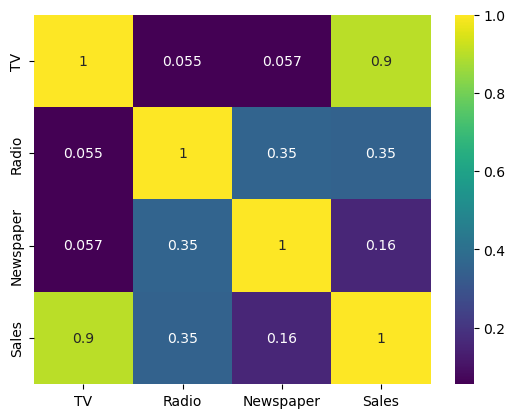

In [152]:
sns.heatmap(ad.corr(), annot=True, cmap="viridis")

In [153]:
ad.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

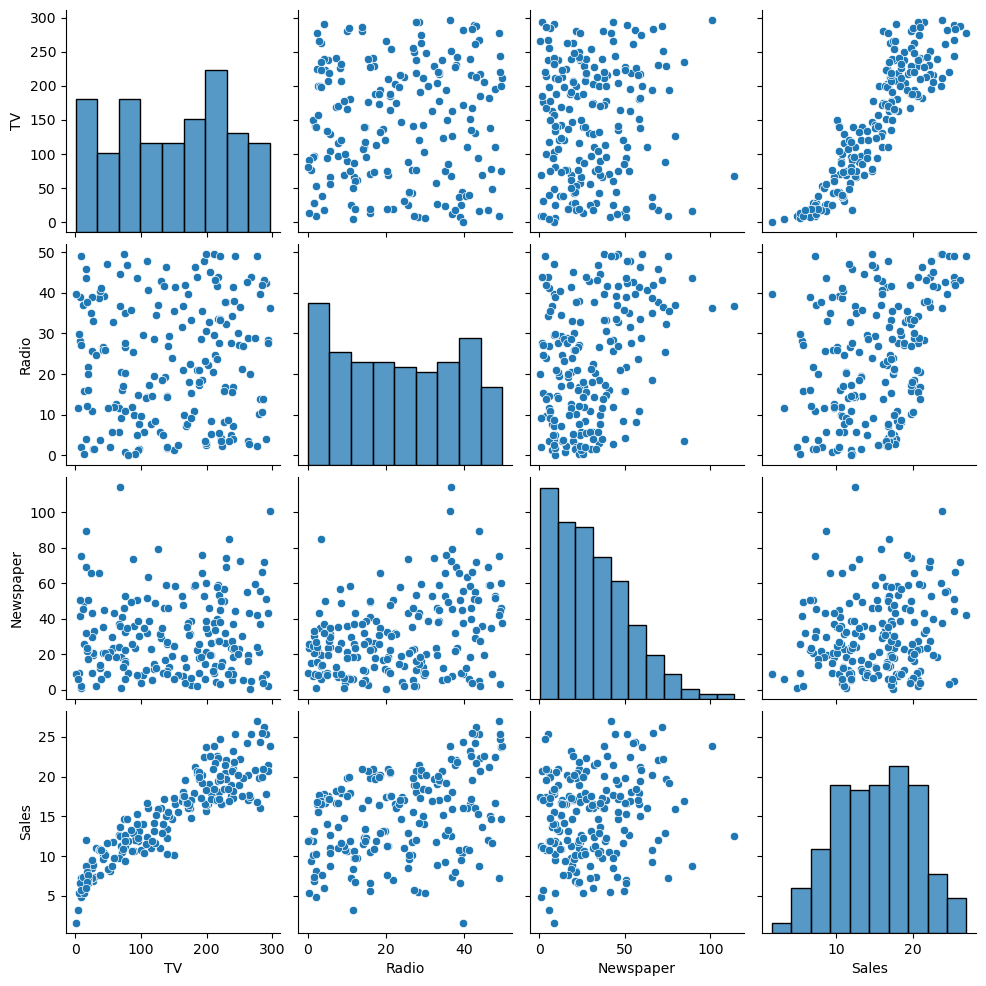

In [154]:
sns.pairplot(ad)

<Axes: xlabel='TV', ylabel='count'>

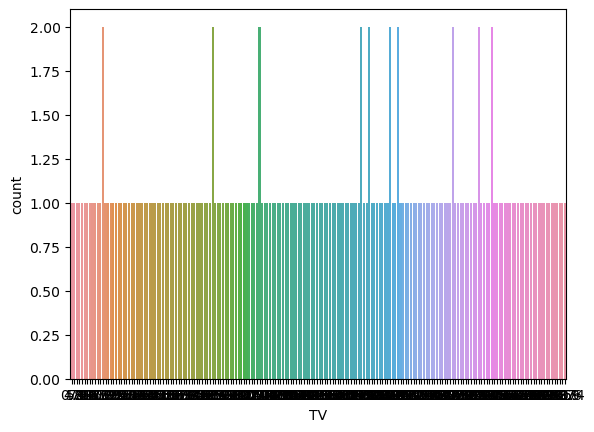

In [155]:
sns.countplot(ad, x="TV")

In [156]:
import cufflinks as cf 
cf.go_offline

<function cufflinks.offline.go_offline(connected=None)>

In [157]:
ad[["Newspaper","TV","Radio"]].iplot(kind="box")

(array([ 2.,  9., 17., 30., 29., 30., 34., 30., 12.,  7.]),
 array([ 1.6 ,  4.14,  6.68,  9.22, 11.76, 14.3 , 16.84, 19.38, 21.92,
        24.46, 27.  ]),
 <BarContainer object of 10 artists>)

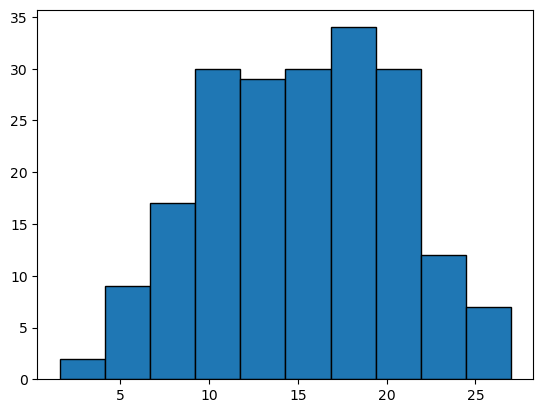

In [158]:
plt.hist(ad["Sales"], edgecolor="k")

(array([47., 41., 35., 30., 21., 13.,  9.,  2.,  1.,  1.]),
 array([  0.3 ,  11.67,  23.04,  34.41,  45.78,  57.15,  68.52,  79.89,
         91.26, 102.63, 114.  ]),
 <BarContainer object of 10 artists>)

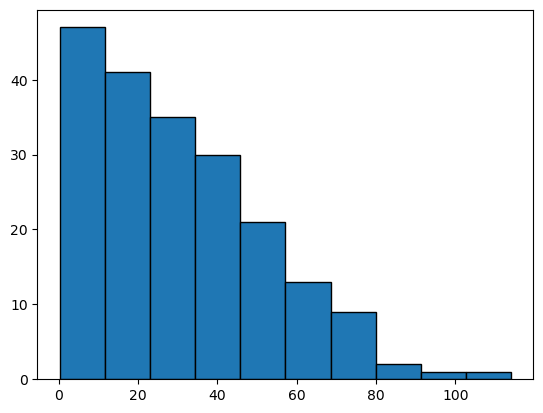

In [159]:
plt.hist(ad["Newspaper"], edgecolor="k")

(array([30., 20., 21., 17., 18., 23., 14., 21., 21., 15.]),
 array([ 0.  ,  4.96,  9.92, 14.88, 19.84, 24.8 , 29.76, 34.72, 39.68,
        44.64, 49.6 ]),
 <BarContainer object of 10 artists>)

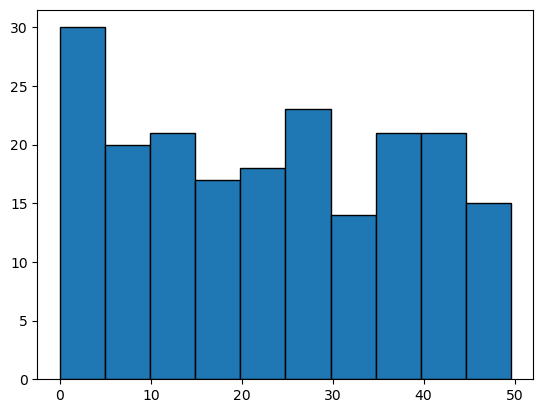

In [160]:
plt.hist(ad["Radio"], edgecolor="k")

(array([26., 15., 21., 18., 19., 17., 22., 26., 20., 16.]),
 array([  0.7 ,  30.27,  59.84,  89.41, 118.98, 148.55, 178.12, 207.69,
        237.26, 266.83, 296.4 ]),
 <BarContainer object of 10 artists>)

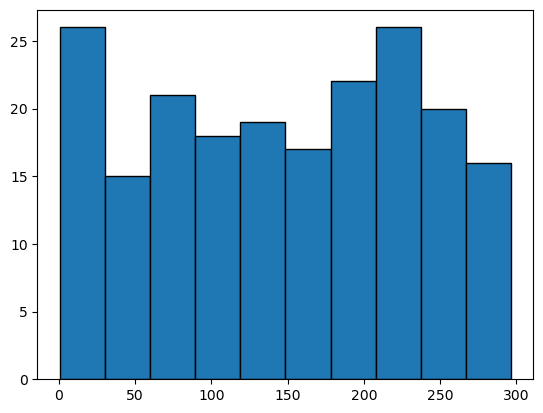

In [161]:
plt.hist(ad["TV"], edgecolor="k")

In [162]:
x=ad["TV"]
y=ad["Sales"]

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3)

In [165]:
x_test.head()

130      0.7
180    156.6
145    140.3
67     139.3
140     73.4
Name: TV, dtype: float64

In [166]:
y_train.head()

96     16.7
97     20.5
2      12.0
173    16.7
41     17.1
Name: Sales, dtype: float64

In [167]:
from sklearn.linear_model import LinearRegression

In [168]:
lm=LinearRegression()

In [169]:
lm.fit(x_train.values.reshape(-1,1), y_train)

LinearRegression()

In [194]:
prediction=lm.predict(x_test.values.reshape(-1,1))

In [195]:
lm.coef_

array([0.05474415])

In [196]:
lm.intercept_

7.121277823148038

In [197]:
from sklearn.metrics import r2_score

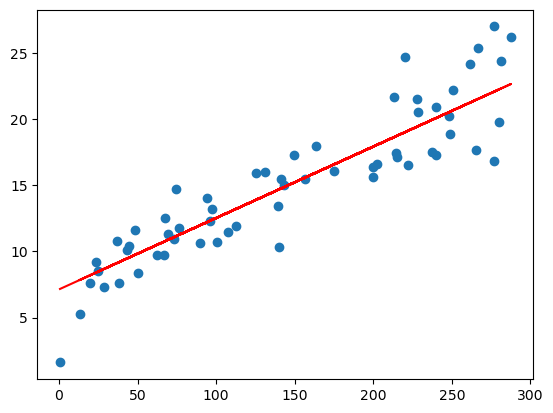

In [198]:
plt.scatter(x_test, y_test)
plt.plot(x_test, 7.121 + 0.054 * x_test, 'r')
plt.show()

In [199]:
r2_score(y_test, prediction)

0.8229627400441707